# Authors:
Parisa Tavakoli Kashi - 40013036

Amirali Hosseinkhani - 40013013

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [252]:
# Define the nude color palette
nude_colors = ['#D7C9AA', '#B7A99A', '#8E7B6B', '#5C4B3C', '#F5F0E6']

# Set the color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=nude_colors)

# Optional: Set figure and axes background color
plt.rcParams['figure.facecolor'] = '#F5F0E6'  # light beige background
plt.rcParams['axes.facecolor'] = '#F5F0E6'    # match axes background

# Optional: Customize grid and ticks
plt.rcParams['grid.color'] = '#D7C9AA'
plt.rcParams['xtick.color'] = '#5C4B3C'
plt.rcParams['ytick.color'] = '#5C4B3C'
plt.rcParams['axes.edgecolor'] = '#8E7B6B'

## 1. Data Preparation

In [253]:
# Load the dataset from an Excel file
df = pd.read_excel('Online Retail.xlsx')

First, the dataset is loaded into a pandas DataFrame. We then perform a preliminary exploratory data analysis (EDA) by displaying the first few rows and calculating summary statistics. This helps us understand the distribution of numeric variables. Next, we check for missing values in the dataset. To make this more insightful, a summary table is created showing the data type of each column along with the count and percentage of missing values.

In [254]:
# Display the first few rows to get an initial view of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [255]:
# Show descriptive statistics for numeric columns (transposed for better readability)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [256]:
# Check for missing values in each column
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [257]:
### Summary Table for Missing Values and Data Types
# Create a summary table showing data types, counts, and percentages of null values for each column
missing_summary = pd.DataFrame({
    'Data Type': df.dtypes.values,
    'Null Values': df.isna().sum().values,
    '% of Null Values': [round(df.isna().sum().values[i] * 100 / len(df), 2) for i in range(len(df.columns))]
}, index=df.columns).T
missing_summary

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Data Type,object,object,object,int64,datetime64[ns],float64,float64,object
Null Values,0,0,1454,0,0,0,135080,0
% of Null Values,0.0,0.0,0.27,0.0,0.0,0.0,24.93,0.0


Approximately 25% of the records lack an associated CustomerID. Since there is insufficient information to accurately infer these missing customer identifiers, these entries cannot be used effectively for our analysis. Therefore, we remove them from the dataset to maintain data integrity.

In [258]:
# Filter rows where the 'Description' is missing and sort them by 'UnitPrice' in descending order
# This helps identify if the missing descriptions correspond to specific types of entries, such as faulty or zero-priced items
df[df.Description.isna() == True].sort_values(by='UnitPrice', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,NaN,United Kingdom
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,NaN,United Kingdom
7191,536999,21421,NaN,110,2010-12-03 15:32:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


These missing description entries correspond to faulty records, often characterized by a zero UnitPrice. Therefore, it is appropriate to remove them from the dataset.

In [259]:
# Remove all rows where 'CustomerID' is missing, since these entries are not useful for analysis
df.dropna(subset=['CustomerID'], axis=0, inplace=True)

# Recalculate and display a summary table showing data types and the updated count and percentage of missing values for each column
pd.DataFrame(data={
    'Data Type': df.dtypes.values,
    'Null Values': df.isna().sum().values,
    '%age of Null Values': [round(df.isna().sum().values[i] * 100 / len(df), 2) for i in range(len(df.columns))]
}, index=df.columns).T


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Data Type,object,object,object,int64,datetime64[ns],float64,float64,object
Null Values,0,0,0,0,0,0,0,0
%age of Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
### Checking for Duplicate Rows
# Print the total number of duplicate rows in the dataframe
print('The number of Duplicates are ', df.duplicated().sum())

# Display all duplicate rows for further inspection
df[df.duplicated() == True]


The number of Duplicates are  5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [261]:
# Remove all duplicate rows from the dataframe to ensure data uniqueness
df.drop_duplicates(inplace=True)

In [262]:
# Verify that all duplicate rows have been removed by counting duplicates again
df.duplicated().sum()

np.int64(0)

## 2. Exploring the Data

### Country

In [263]:
# Retrieve and display the unique countries present in the dataset
unique_countries = df.Country.unique()
print(f'Total unique countries: {len(unique_countries)}')
print(unique_countries)

Total unique countries: 37
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [264]:
# Count and display the number of transactions for each country, sorted from highest to lowest
country_counts = df.Country.value_counts()
print(country_counts)

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


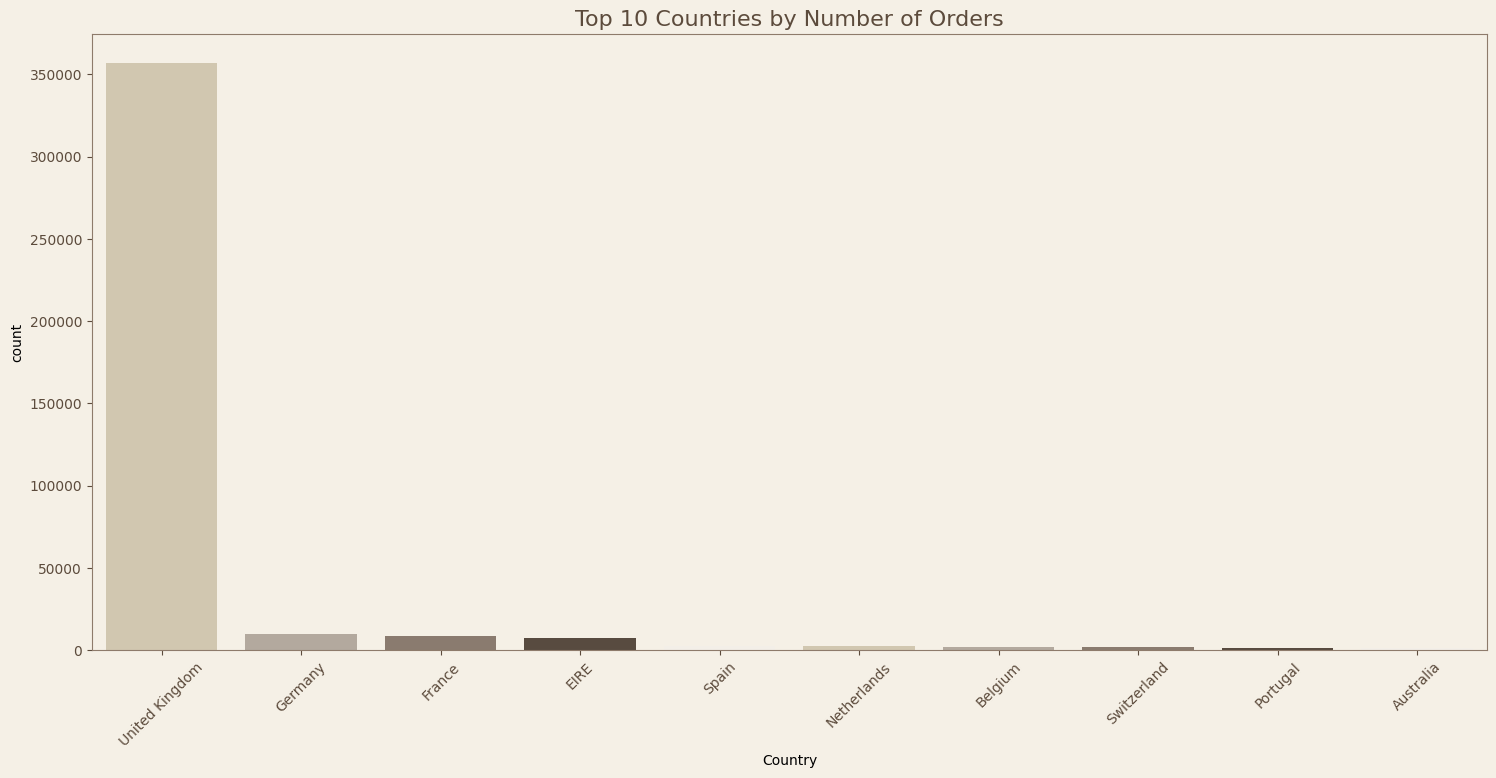

In [265]:
# Define a nude color palette for consistency
nude_palette = ['#D7C9AA', '#B7A99A', '#8E7B6B', '#5C4B3C', '#F5F0E6']

# Set the palette for the plot
sns.set_palette(nude_palette)

# Plot the count of orders for the top 10 countries
plt.figure(figsize=(18, 8))
sns.countplot(
    x=df.Country,
    order=df.Country.value_counts(ascending=False).index[:10],
    palette=nude_palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the plot title
plt.title('Top 10 Countries by Number of Orders', fontsize=16, color='#5C4B3C')

# Display the plot
plt.show()

The above graph illustrates the distribution of orders among the top 10 countries, ranked by order volume. It is evident that over 90% of the orders originate from the United Kingdom, while no other country accounts for more than 3% of the total orders.
Given this dominance, the analysis will focus exclusively on orders from the United Kingdom. A subset containing only UK orders will be created in a subsequent step and referenced accordingly throughout the analysis.

### Customers and Products

In [266]:
# Summarize key dataset metrics:
# - Total unique products based on 'StockCode'
# - Total unique transactions based on 'InvoiceNo'
# - Total unique customers based on 'CustomerID'
summary_stats = pd.DataFrame([{
    'Products': df['StockCode'].nunique(),        # Count of distinct products
    'Transactions': df['InvoiceNo'].nunique(),    # Count of unique invoices (transactions)
    'Customers': df['CustomerID'].nunique(),      # Count of unique customers
}], index=['Quantity'])

summary_stats

,Products,Transactions,Customers
Quantity,3684,22190,4372


The dataset contains information on 4,372 unique customers who purchased 3,958 distinct products. In total, there are approximately 22,000 transactions recorded.
Next, we will calculate the number of products purchased in each individual transaction to better understand purchase behavior at the transaction level.

In [267]:
# Group data by 'InvoiceNo' (transaction ID) to count the number of products purchased per transaction
# 'Description' is used as a proxy for counting items in each invoice
temp = df.groupby('InvoiceNo', as_index=False).agg(
    {'Description': np.count_nonzero}
).sort_values(by='Description', ascending=False)

# Rename columns for clarity
temp.columns = ['InvoiceNo', 'Total_Orders']

# Display the resulting dataframe showing number of products per transaction, sorted descending
temp

,InvoiceNo,Total_Orders
16242,576339,542
17524,579196,533
18165,580727,529
17128,578270,442
15081,573576,435
...,...,...
22158,C581121,1
22159,C581124,1
22160,C581128,1
16256,576361,1


The top entries of this list reveal several important insights:
Some InvoiceNo values begin with the prefix 'C', indicating canceled transactions.
There are customers who made a single purchase consisting of just one product (e.g., invoice number 12346).
There are also frequent buyers who place orders containing a large number of items.
These observations highlight the diversity of purchasing behaviors within the dataset.

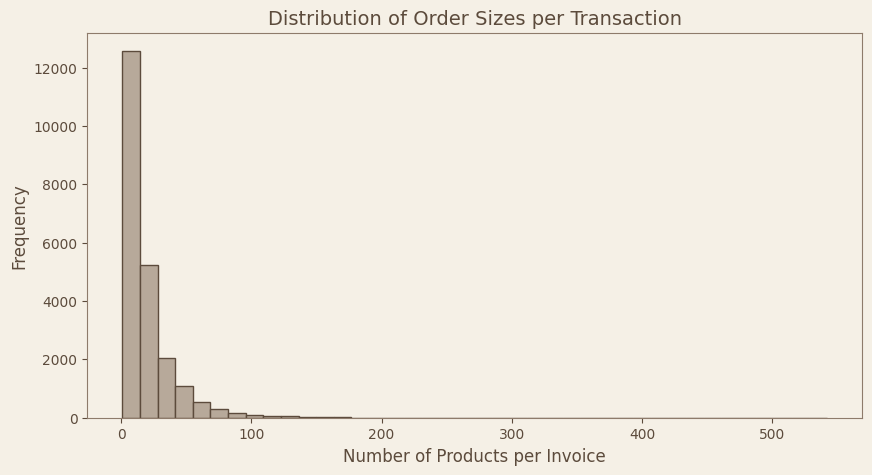

In [268]:
import matplotlib.pyplot as plt

# Plot the distribution of the number of products ordered per invoice
plt.figure(figsize=(10, 5))

# Create a histogram showing how many products are typically purchased in each transaction
plt.hist(temp.Total_Orders, bins=40, color='#B7A99A', edgecolor='#5C4B3C')

# Label the axes for clarity
plt.xlabel('Number of Products per Invoice', fontsize=12, color='#5C4B3C')
plt.ylabel('Frequency', fontsize=12, color='#5C4B3C')

# Set a descriptive title
plt.title('Distribution of Order Sizes per Transaction', fontsize=14, color='#5C4B3C')

# Display the plot
plt.show()


In [269]:
# Create a new column 'check' to mark invoices as 'Cancelled' if 'InvoiceNo' starts with 'C', else 'Not Cancelled'
temp['check'] = temp['InvoiceNo'].astype(str).apply(lambda x: 'Cancelled' if x.startswith('C') else 'Not Cancelled')

In [270]:
# Print the count of invoices grouped by their cancellation status ('Cancelled' vs 'Not Cancelled')
print(temp.check.value_counts())

check
Not Cancelled    18536
Cancelled         3654
Name: count, dtype: int64


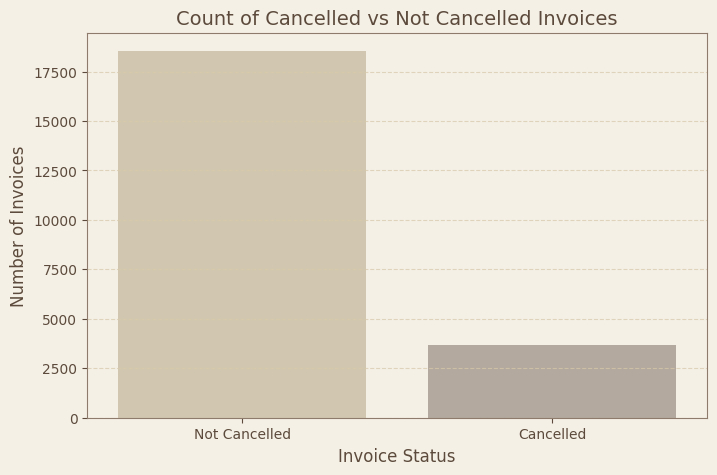

In [271]:
# Plot count of cancelled vs not cancelled invoices
plt.figure(figsize=(8,5))
sns.countplot(x=temp.check, palette=nude_palette)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Invoice Status', fontsize=12, color='#5C4B3C')
plt.ylabel('Number of Invoices', fontsize=12, color='#5C4B3C')
plt.title('Count of Cancelled vs Not Cancelled Invoices', fontsize=14, color='#5C4B3C')

plt.show()

In [272]:
# Calculate and print the percentage of cancelled orders in the dataset
cancelled_percentage = round(temp.check.value_counts().get('Cancelled', 0) * 100 / len(temp), 2)
print(f'\nAround {cancelled_percentage}% of orders were cancelled')


Around 16.47% of orders were cancelled


It is noteworthy that cancellations constitute a significant portion, approximately 16%, of all transactions in the dataset.

In [273]:
# Display the first 2 rows of the dataframe to get a quick look at the data structure
df.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Stock Code

In [274]:
# Create a new dataframe 'temp' with 'StockCode', 'Description',
# and a boolean column 'dtype' indicating if 'StockCode' is a valid Python identifier
temp = pd.DataFrame({
    'StockCode': df.StockCode,
    'Description': df.Description,
    'dtype': [str(k).isidentifier() for k in df.StockCode]
})

# Display the first 5 rows where 'StockCode' is a valid Python identifier
temp[temp.dtype == True].head(5)


,StockCode,Description,dtype
45,POST,POSTAGE,True
141,D,Discount,True
386,POST,POSTAGE,True
1123,POST,POSTAGE,True
1423,C2,CARRIAGE,True


In [275]:
# Get the unique 'StockCode' values that are valid Python identifiers
valid_stockcodes = temp[temp.dtype == True].StockCode.unique()
valid_stockcodes


array(['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [276]:
# Define a list of specific StockCodes of interest
codes = ['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK']

# Filter 'temp' dataframe to keep only rows where 'StockCode' is in the defined list
temp = temp[temp.StockCode.isin(codes)]

# For each StockCode, print the code alongside its unique product description
for code in codes:
    description = temp[temp.StockCode == code].Description.unique()[0]
    print(f"{code:<15} -> {description:<30}")


POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


We observe several unusual transaction types related to additional charges or special cases, such as postage fees, bank charges, discounts, and free gifts.

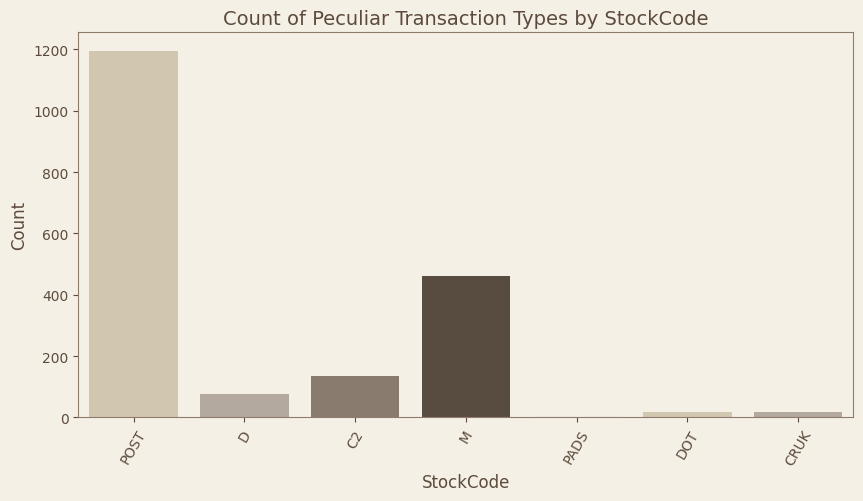

In [277]:
# Plot the count of each peculiar StockCode in the filtered dataset
plt.figure(figsize=(10, 5))
sns.countplot(x=temp.StockCode, palette=nude_palette)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add title and axis labels
plt.title('Count of Peculiar Transaction Types by StockCode', fontsize=14, color='#5C4B3C')
plt.xlabel('StockCode', fontsize=12, color='#5C4B3C')
plt.ylabel('Count', fontsize=12, color='#5C4B3C')

# Show the plot
plt.show()

## Total Amount per Billing

To gain an overall understanding of the types of orders in the dataset, I will analyze how the total purchase amounts are distributed across transactions. This will help categorize orders based on their monetary value.

In [278]:
# Calculate the total amount for each line item by multiplying unit price with quantity purchased
df['Amount'] = df['UnitPrice'] * df['Quantity']

# Display the first few rows to verify the new 'Amount' column
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [279]:
# Filter the dataframe to include only rows with positive quantity
# and exclude transactions with peculiar StockCodes defined earlier
filtered_df = df[(df.Quantity > 0) & (~df.StockCode.isin(codes))]

# Group by 'InvoiceNo' to aggregate total quantity and total amount per transaction
temp = filtered_df.groupby('InvoiceNo', as_index=False).agg({
    'Quantity': 'sum',
    'Amount': 'sum'
})

# Display the first few rows of the aggregated data
temp.head()


,InvoiceNo,Quantity,Amount
0,536365,40,139.12
1,536366,12,22.20
2,536367,83,278.73
3,536368,15,70.05
4,536369,3,17.85


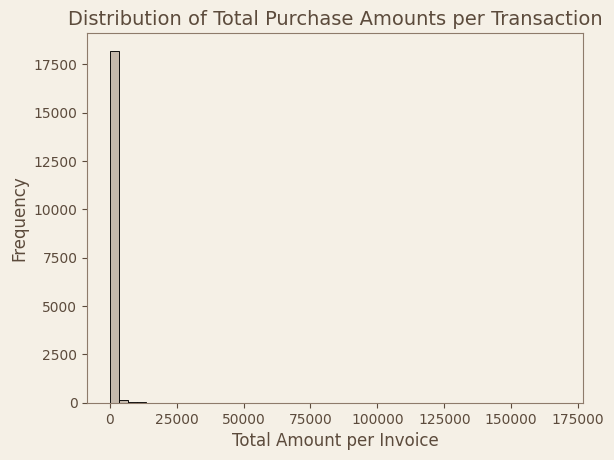

In [280]:
# Use seaborn's histplot (replacement for distplot) with no KDE
sns.histplot(data=temp[temp.Amount != 0], x='Amount', bins=50, kde=False, color='#B7A99A')

# Set plot labels and title
plt.xlabel('Total Amount per Invoice', fontsize=12, color='#5C4B3C')
plt.ylabel('Frequency', fontsize=12, color='#5C4B3C')
plt.title('Distribution of Total Purchase Amounts per Transaction', fontsize=14, color='#5C4B3C')

plt.show()

Maximum orders are under $12500

In [281]:
# Define bins for categorizing total amounts into meaningful spending ranges
bins = [-1, 50, 100, 200, 500, 1000, 5000, float('inf')]

# Corresponding labels for each bin
names = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+']

# Categorize 'Amount' into bins and assign the labels in a new column 'amount_cat'
temp = temp.copy()  # Avoid SettingWithCopyWarning if temp is a slice
temp['amount_cat'] = pd.cut(temp['Amount'], bins=bins, labels=names)

# Display first few rows to verify the new category column
temp.head()

,InvoiceNo,Quantity,Amount,amount_cat
0,536365,40,139.12,100-200
1,536366,12,22.20,<50
2,536367,83,278.73,200-500
3,536368,15,70.05,50-100
4,536369,3,17.85,<50


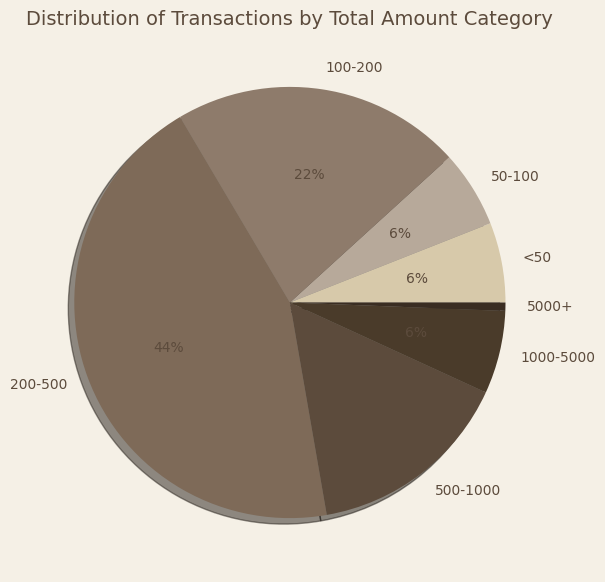

In [282]:
import matplotlib.pyplot as plt

# Define nude color palette for pie slices
nude_colors = ['#D7C9AA', '#B7A99A', '#8E7B6B', '#7E6A58', '#5C4B3C', '#4A3B2A', '#3A2D22']

# Prepare data: count of transactions by amount category, excluding zero amounts
amount_counts = temp[temp.Amount > 0]['amount_cat'].value_counts().reindex(names)

# Plot pie chart showing distribution of transactions by purchase amount category
plt.figure(figsize=(7,7))
plt.pie(
    amount_counts.values,
    labels=names,
    autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',  # Show % only if >1%
    shadow=True,
    startangle=0,
    colors=nude_colors,
    textprops={'color':'#5C4B3C'}
)
plt.title('Distribution of Transactions by Total Amount Category', fontsize=14, color='#5C4B3C')
plt.show()


It can be observed that the vast majority of orders are of low value, with approximately 78% of purchases priced below £200.

In [283]:
# Filter the dataframe to include only positive quantities and exclude peculiar StockCodes
filtered_df = df[(df.Quantity > 0) & (~df.StockCode.isin(codes))]

# Group the filtered data by 'Country' and aggregate the total Quantity and Amount per country
temp = filtered_df.groupby('Country', as_index=False).agg({
    'Quantity': 'sum',
    'Amount': 'sum'
})

# Display the first few rows of the aggregated data
temp.head()


,Country,Quantity,Amount
0,Australia,84198,138103.81
1,Austria,4844,8742.68
2,Bahrain,260,548.40
3,Belgium,22962,36927.34
4,Brazil,356,1143.60


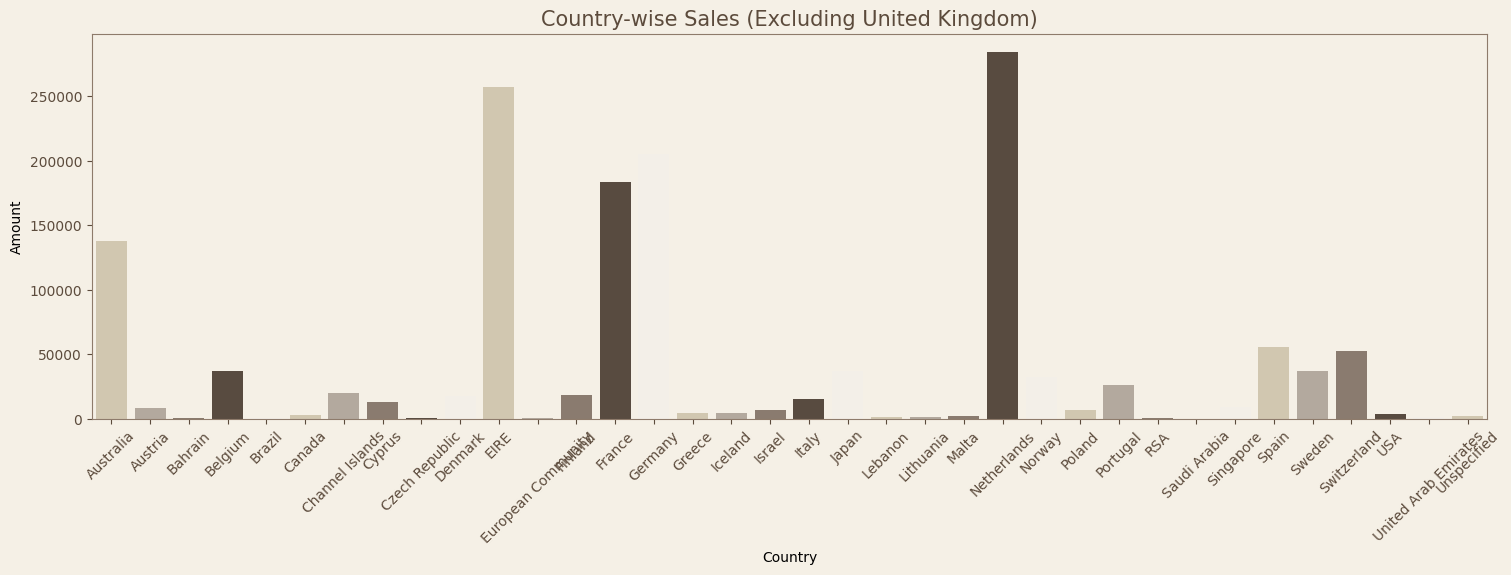

In [284]:
# Plot country-wise sales excluding the United Kingdom
plt.figure(figsize=(18, 5))
sns.barplot(
    x='Country',
    y='Amount',
    data=temp[temp.Country != 'United Kingdom'],
    palette=nude_palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title with styling
plt.title('Country-wise Sales (Excluding United Kingdom)', fontsize=15, color='#5C4B3C')

# Show the plot
plt.show()

## 3. Understanding Cohort Analysis

Understanding Cohort Analysis
A cohort refers to a group of users who share common characteristics during a specific timeframe. Cohort analysis segments these users into distinct groups and monitors their behavior over time.

This technique is useful for gaining insights into customer journeys and product lifecycles.

There are three primary types of cohort analysis:
1. Time-based cohorts: Users grouped according to when they made purchases or engaged with a product.
2. Behavior-based cohorts: Users grouped based on the specific products or services they have used or signed up for.
3. Size-based cohorts: Users categorized by the volume or value of their purchases within a defined period.

By analyzing these cohorts, businesses can better understand customer needs and tailor their offerings accordingly.
For this project, we will focus on time-based cohorts to track customer retention and activity throughout their purchasing timeline.

### Time Cohorts

The dataset covers transactions from December 1, 2010, to December 9, 2011.
Next, we create a new column called CohortMonth, which represents the month of each transaction by extracting the first day of the transaction month from the InvoiceDate. Then, for each customer, we identify their first transaction month by grouping the data by CustomerID.

In [285]:
# Start and end dates:
print('Start date: {}'.format(df.InvoiceDate.min()))
print('End date: {}'.format(df.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [286]:
# Select relevant columns from the original dataframe to create a simplified cohort analysis dataset
cohort_data = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Amount', 'CustomerID', 'Country']]


In [287]:
# Check for missing values in each column of the cohort_data dataframe
cohort_data.isna().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Amount,0
CustomerID,0
Country,0


In [288]:
# Convert 'InvoiceDate' to datetime objects with time set to midnight (year-month-day only) for consistency
cohort_data['InvoiceDate'] = pd.to_datetime(cohort_data['InvoiceDate']).apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [289]:
# Display the first two rows of the cohort_data dataframe to verify the data structure
cohort_data.head()[:2]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom


In [290]:
# For each customer, find the date of their first transaction (minimum InvoiceDate)
grouping = cohort_data.groupby('CustomerID', as_index=False)['InvoiceDate'].min()

# Rename the columns for clarity
grouping.columns = ['CustomerID', 'CohortMonth']

# Convert the first transaction date to the first day of that month (cohort month)
grouping['CohortMonth'] = grouping['CohortMonth'].apply(lambda x: dt.datetime(x.year, x.month, 1))

# Merge the cohort month information back into the main dataframe by CustomerID
cohort_data = cohort_data.merge(grouping, on='CustomerID', how='left')

# Display the first few rows to verify the added CohortMonth column
cohort_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01


In [291]:
# Original method: approximate months by dividing days difference by 30 and converting to int
cohort_data['CohortIndex'] = pd.Series(((cohort_data['InvoiceDate'] - cohort_data['CohortMonth']) / 30).dt.days).astype(int)
# Display the last few rows of the cohort_data dataframe to check recent entries and verify calculations
cohort_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,10.20,12680.0,France,2011-08-01,4
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12.60,12680.0,France,2011-08-01,4
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01,4
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,16.60,12680.0,France,2011-08-01,4
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,14.85,12680.0,France,2011-08-01,4


In [292]:
# Group data by CohortMonth and CohortIndex, counting unique customers in each group
grouping = cohort_data.groupby(['CohortMonth', 'CohortIndex'], as_index=False).agg({'CustomerID': 'nunique'})

# Create a pivot table with CohortMonth as rows and CohortIndex as columns,
# showing the number of unique customers active in each cohort over time
cohort_counts = grouping.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Display the cohort counts matrix
cohort_counts


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,341.0,339.0,355.0,353.0,367.0,349.0,340.0,330.0,354.0,355.0,467.0,334.0
2011-01-01,403.0,122.0,117.0,102.0,136.0,122.0,111.0,104.0,122.0,144.0,154.0,89.0,NaN
2011-02-01,380.0,95.0,72.0,103.0,102.0,92.0,95.0,100.0,103.0,113.0,51.0,NaN,NaN
2011-03-01,422.0,100.0,108.0,93.0,99.0,78.0,106.0,108.0,125.0,56.0,NaN,NaN,NaN
2011-04-01,299.0,67.0,67.0,65.0,60.0,63.0,70.0,77.0,35.0,NaN,NaN,NaN,NaN
2011-05-01,270.0,73.0,50.0,46.0,51.0,78.0,69.0,43.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,46.0,44.0,59.0,58.0,77.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,187.0,43.0,38.0,46.0,49.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,162.0,48.0,37.0,45.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interpretation of the Cohort Table

Take, for example, the cohort starting in December 2010 (CohortMonth 2010-12-01):

* At CohortIndex 0, there were 815 unique customers who made purchases during their first month.

* At CohortIndex 1, out of those 815 customers, 289 returned and made purchases in the following month.

* At CohortIndex 2, 263 customers from that original group made purchases two months later.

* This pattern continues for subsequent months (higher CohortIndices), showing how many customers remain active over time.

Retention Rate Calculation

The retention rate measures the percentage of customers from the original cohort who remain active in each following period. Since the total number of customers in each cohort corresponds to the count at CohortIndex 0, we use the first column of the cohort table as the baseline to calculate retention percentages for subsequent months.

In [293]:
# Extract the size of each cohort, i.e., the number of unique customers in their first month (CohortIndex 0)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention by dividing each cohort's monthly active customer count by its initial size
# This gives the percentage of customers retained over time for each cohort
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Round retention values to three decimals and convert to percentages
retention = retention.round(3) * 100

# Display the retention rate table
retention


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.0,35.8,37.4,37.2,38.7,36.8,35.9,34.8,37.3,37.4,49.3,35.2
2011-01-01,100.0,30.3,29.0,25.3,33.7,30.3,27.5,25.8,30.3,35.7,38.2,22.1,NaN
2011-02-01,100.0,25.0,18.9,27.1,26.8,24.2,25.0,26.3,27.1,29.7,13.4,NaN,NaN
2011-03-01,100.0,23.7,25.6,22.0,23.5,18.5,25.1,25.6,29.6,13.3,NaN,NaN,NaN
2011-04-01,100.0,22.4,22.4,21.7,20.1,21.1,23.4,25.8,11.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,27.0,18.5,17.0,18.9,28.9,25.6,15.9,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,19.6,18.7,25.1,24.7,32.8,14.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,23.0,20.3,24.6,26.2,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,29.6,22.8,27.8,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


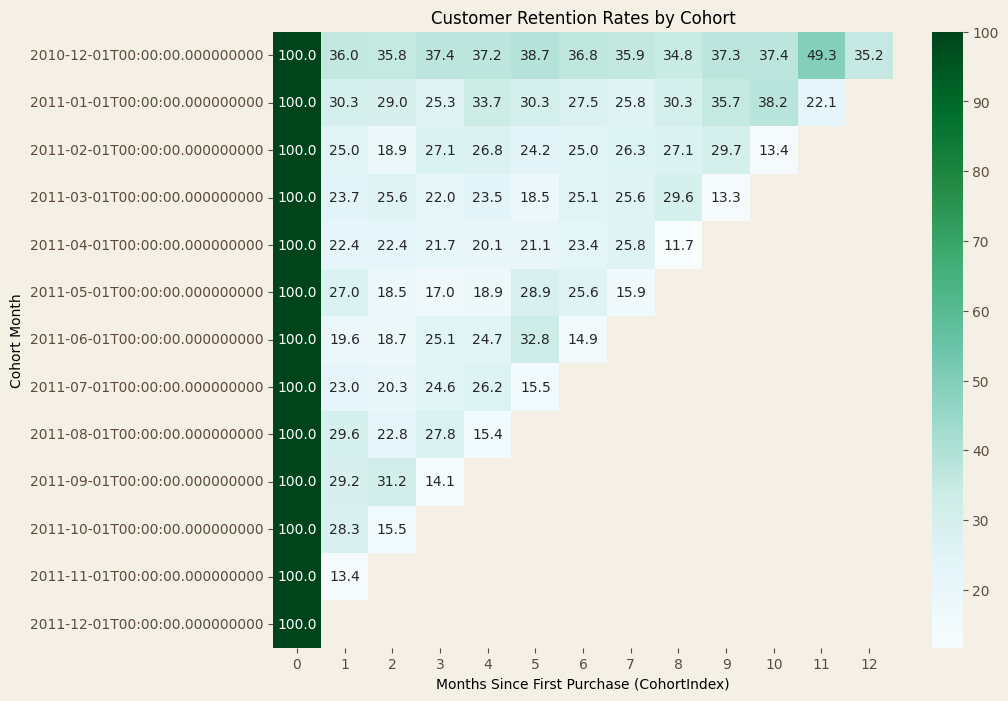

In [294]:
# Plot a heatmap to visualize customer retention rates over time by cohort
# Using a calm, nude-toned palette ('BuGn') for better readability and aesthetics
plt.figure(figsize=(10, 8))
sns.heatmap(retention, annot=True, fmt='0.1f', cmap='BuGn')
plt.title('Customer Retention Rates by Cohort')
plt.xlabel('Months Since First Purchase (CohortIndex)')
plt.ylabel('Cohort Month')
plt.show()


# 4. RFM Segmentation

# RFM Analysis: Recency, Frequency, and Monetary

RFM analysis is a popular method used to evaluate and score customers based on three key metrics:

- **Recency:** How recently a customer made their last purchase.
- **Frequency:** How often a customer has made purchases within a given period, typically the last year.
- **Monetary:** The total monetary value of a customer’s transactions during that period.

By combining these three dimensions, RFM analysis helps businesses identify and segment their most valuable customers, tailor marketing strategies, and improve customer retention.

RFM analysis helps answer key business questions such as:  
- Who was our most recent customer?  
- How many times has this customer made purchases?  
- What is the total monetary value of their transactions?

This information is crucial for understanding the value and behavior of each customer.

After calculating the RFM metrics, it is common practice to divide each metric into **quartiles** and assign scores accordingly. This helps segment customers into different groups based on their recency, frequency, and monetary value.


We will use the **Amount** column to determine the monetary value of each transaction.  
By calling the `.describe()` method on this column, we can get a summary of its distribution:

In [295]:
# Display the first 3 rows of the cohort_data DataFrame to inspect its structure and content
cohort_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,15.30,17850.0,United Kingdom,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,20.34,17850.0,United Kingdom,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,22.00,17850.0,United Kingdom,2010-12-01,0


The definition of **Recency** is based on a full one-year period of data.  
Therefore, we will trim the dataset to include only transactions within one year from the latest date in the data.

In [296]:
# Define the one-year date range to be used for Recency calculation
print("The date range we will select is:\n")

# Calculate the start date as 364 days before the latest InvoiceDate
start_date = cohort_data.InvoiceDate.max() - dt.timedelta(days=364)

# Print the start and end dates of the selected range
print('Start Date:', start_date)
print('End Date:', cohort_data.InvoiceDate.max())

The date range we will select is:

Start Date: 2010-12-10 00:00:00
End Date: 2011-12-09 00:00:00


In [297]:
# Filter the dataset to include only transactions within the last year (from start_date onwards)
# Also, consider only transactions with a positive Amount (valid purchases)
data_rfm = cohort_data[(cohort_data.InvoiceDate >= start_date) & (cohort_data.Amount > 0)]

# Reset the DataFrame index after filtering for cleaner data handling
data_rfm.reset_index(drop=True, inplace=True)

# Display the first few rows of the filtered dataset
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,CohortMonth,CohortIndex
0,538172,21562,HAWAIIAN GRASS SKIRT,12,2010-12-10,1.25,15.0,15805.0,United Kingdom,2010-12-01,0
1,538172,79321,CHILLI LIGHTS,8,2010-12-10,4.95,39.6,15805.0,United Kingdom,2010-12-01,0
2,538172,22041,"RECORD FRAME 7"" SINGLE SIZE",12,2010-12-10,2.55,30.6,15805.0,United Kingdom,2010-12-01,0
3,538172,84558A,3D DOG PICTURE PLAYING CARDS,12,2010-12-10,2.95,35.4,15805.0,United Kingdom,2010-12-01,0
4,538172,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-10,0.55,13.2,15805.0,United Kingdom,2010-12-01,0


For the RFM analysis, we need to define a **snapshot date** — the reference date from which Recency will be calculated.  
In this case, we choose the snapshot date as one day after the latest transaction date in our dataset.  
This corresponds to **2011-12-10** (YYYY-MM-DD).


In [298]:
# Define the snapshot date as one day after the latest transaction date in the filtered data
snapshot_date = data_rfm.InvoiceDate.max() + dt.timedelta(days=1)  # Reference date for RFM calculation

# Display the snapshot date
print('Snapshot Date:', snapshot_date)


Snapshot Date: 2011-12-10 00:00:00


In [299]:
# Aggregate transaction data at the customer level to compute RFM metrics

data = data_rfm.groupby('CustomerID', as_index=False).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calculate Recency: days since last purchase
    'InvoiceNo': 'count',                                      # Frequency: number of transactions
    'Amount': 'sum'                                            # MonetaryValue: total spend
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Amount': 'MonetaryValue'
})

# Display the first few rows of the RFM table
data.head()


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,3,151,3598.21
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


For the **Recency** metric, customers with the smallest recency values (i.e., the most recent customers) will be assigned the highest score of 4.

For **Frequency** and **Monetary** metrics, the top 25% of customers in each category will receive the highest score of 4.

Once we divide each metric into quartiles, we combine their scores into a single RFM class string (e.g., `'213'`), which segments customers based on their combined Recency, Frequency, and Monetary scores.

The number of divisions (quartiles, quintiles, etc.) can be adjusted based on analysis requirements.


In [300]:
# Assign quartile scores to Recency, Frequency, and MonetaryValue

# Recency: smallest values get highest score (4), indicating recent customers
r_quartiles = pd.qcut(data.Recency, 4, labels=[4, 3, 2, 1])

# Frequency: highest values get highest score (4), indicating frequent customers
f_quartiles = pd.qcut(data.Frequency, 4, labels=[1, 2, 3, 4])

# MonetaryValue: highest values get highest score (4), indicating high spenders
m_quartiles = pd.qcut(data.MonetaryValue, 4, labels=[1, 2, 3, 4])

# Add the quartile scores as new columns to the dataframe
data['R'] = r_quartiles
data['F'] = f_quartiles
data['M'] = m_quartiles


In [301]:
# Display the first few rows of the data with R, F, M quartile scores added
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12347.0,3,151,3598.21,4,4,4
2,12348.0,76,31,1797.24,2,2,4
3,12349.0,19,73,1757.55,3,3,4
4,12350.0,311,17,334.40,1,1,2


In [302]:
# Create an RFM segment by concatenating the R, F, M scores as strings (e.g., '431')
data['RFM_Segment'] = data.apply(lambda row: f"{row.R}{row.F}{row.M}", axis=1)

# Calculate the total RFM score by summing the individual R, F, and M quartile scores
data['RFM_Score'] = data.R.astype(int) + data.F.astype(int) + data.M.astype(int)

In [303]:
# Display the updated dataframe with RFM_Segment and RFM_Score columns
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
1,12347.0,3,151,3598.21,4,4,4,4.04.04.0,12
2,12348.0,76,31,1797.24,2,2,4,2.02.04.0,8
3,12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
4,12350.0,311,17,334.40,1,1,2,1.01.02.0,4


Let us now analyse RFM Score distribution and their groups.

In [304]:
# Aggregate data by RFM_Score to analyze average Recency, Frequency, MonetaryValue
# Also count the number of customers in each RFM_Score group
data.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           246.0       8.2         156.2   373
4           167.1      14.0         237.3   387
5           145.4      20.6         363.6   495
6            88.3      26.8         810.0   456
7            83.5      39.3         756.6   453
8            59.2      54.0         977.9   462
9            44.0      76.9        1808.6   395
10           32.1     109.2        2032.5   431
11           21.1     184.5        4010.5   375
12            7.6     362.1        9126.3   437

As anticipated, customers with the lowest RFM scores tend to have the highest recency values, meaning they haven't purchased recently. They also exhibit lower frequency and monetary values. Conversely, customers with higher RFM scores are more recent buyers, purchase more frequently, and contribute higher monetary value. This confirms that the RFM scoring effectively segments customers based on their engagement and value.

#### Creating General Customer Segments Based on RFM Scores

We will categorize customers into three broad groups based on their total RFM_Score (ranging from 3 to 12):

1. **Top Segment:** Customers with RFM_Score >= 9  
2. **Middle Segment:** Customers with RFM_Score between 5 and 8 (inclusive)  
3. **Low Segment:** Customers with RFM_Score less than 5  

These groups will be stored in a new column called `General_Segment`.  
Next, we will analyze the average recency, frequency, and monetary values for each segment to understand their behavior.


In [305]:
# Create broader customer segments based on RFM scores
bins = [0, 5, 9, np.inf]  # Define bins for Low, Middle, Top segments
labels = ['Low', 'Middle', 'Top']  # Labels for the segments

# Categorize customers into General_Segment based on their RFM_Score
data['General_Segment'] = pd.cut(data.RFM_Score, bins=bins, labels=labels)


In [306]:
# Aggregate and summarize Recency, Frequency, and MonetaryValue by General_Segment
data.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               182.0      14.8         263.0  1255
Middle             69.5      48.4        1063.6  1766
Top                20.2     220.8        5123.2  1243

### Using Clustering for RFM Segmentation

While simple binning (like quartiles) works in many cases, a more nuanced segmentation can be achieved using clustering algorithms such as K-means.

Clustering groups customers based on similarities in their Recency, Frequency, and Monetary values, allowing for more natural and data-driven segments instead of fixed arbitrary bins.

## Preprocessing data for Clustering

In the upcoming section, we will prepare the RFM data for K-means clustering. To ensure effective clustering, it is important to preprocess the data so it meets K-means assumptions:

1. Variables should be symmetrically distributed (ideally normal distribution).
2. Variables should have similar mean values to avoid dominance by any feature.
3. Variables should have comparable standard deviations to ensure equal weighting.

Proper preprocessing, such as scaling and transformation, helps achieve these conditions for better clustering results.


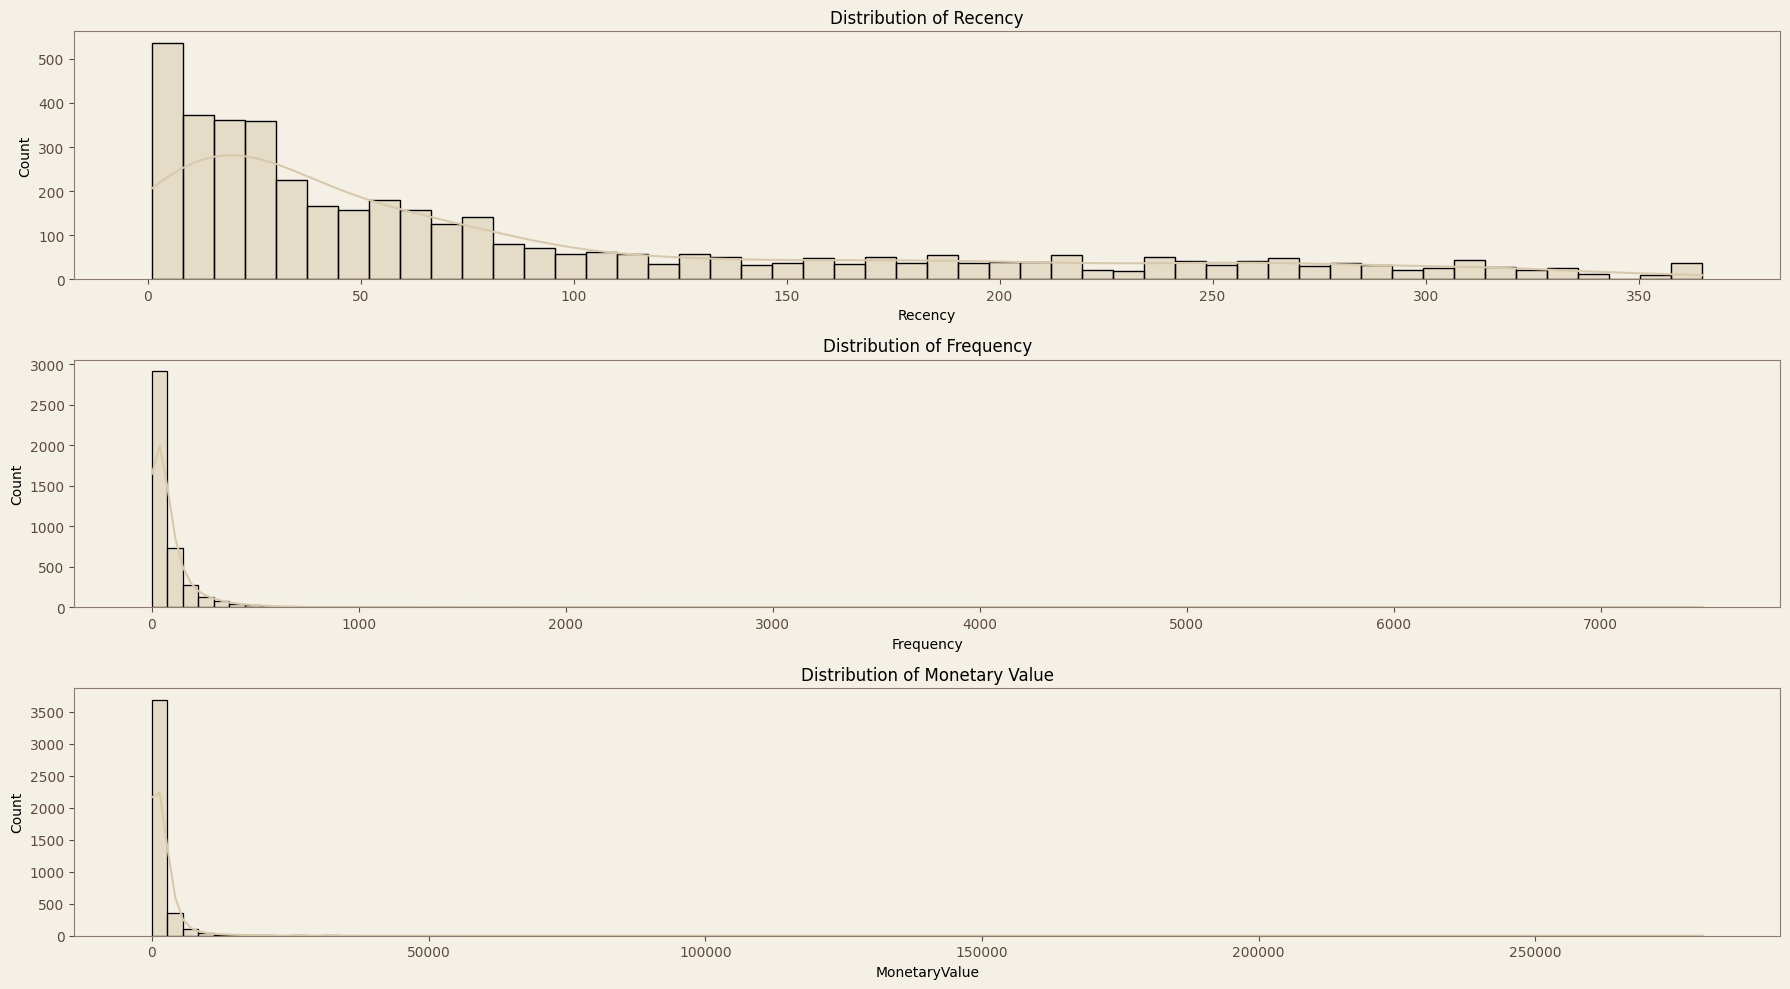

In [307]:
# Visualizing the distribution of RFM variables to understand their spread and check for skewness
plt.figure(figsize=(18,10))

# Distribution plot for Recency (days since last purchase)
plt.subplot(3, 1, 1)
sns.histplot(data['Recency'], bins=50, kde=True)
plt.title('Distribution of Recency')

# Distribution plot for Frequency (number of purchases)
plt.subplot(3, 1, 2)
sns.histplot(data['Frequency'], bins=100, kde=True)
plt.title('Distribution of Frequency')

# Distribution plot for Monetary Value (total spending)
plt.subplot(3, 1, 3)
sns.histplot(data['MonetaryValue'], bins=100, kde=True)
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()

### Distribution Analysis and Transformation of RFM Variables

As observed from the distribution plots, the variables **Recency**, **Frequency**, and **Monetary Value** are right-skewed, meaning values cluster at the lower end with a long right tail. Since K-means clustering assumes more symmetrical data distributions, we need to address this skewness.

Common transformation techniques to reduce skewness include:

1. **Log Transformation**: Compresses large values and reduces right skewness.
2. **Box-Cox Transformation**: A flexible power transformation that can normalize data.
3. **Cube Root Transformation**: Useful for moderate skewness reduction.

Log transformation requires all positive values. A typical workaround is to add a constant (e.g., absolute value of the smallest negative + 1) to shift data positive. However, in this dataset, all values are already non-negative, so log transformation can be applied directly.


In [308]:
# Summary statistics of original RFM variables
data[['Recency', 'Frequency', 'MonetaryValue']].describe().T


,count,mean,std,min,25%,50%,75%,max
Recency,4264.0,88.241792,93.888162,1.00,18.000,50.00,134.0000,365.00
Frequency,4264.0,88.768293,220.815601,1.00,17.000,40.00,97.0000,7491.00
MonetaryValue,4264.0,2011.386614,8780.849894,3.75,303.045,660.66,1636.3625,280206.02


### Observations on RFM Variables

- The minimum value for each of the RFM columns (`Recency`, `Frequency`, and `MonetaryValue`) is greater than 0.
- The means and standard deviations of these variables vary considerably, indicating they are on different scales and not standardized.

In [309]:
data.sample(5)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
1987,15101.0,9,8,317.53,4,1,2,4.01.02.0,7,Middle
109,12481.0,23,206,5420.44,3,4,4,3.04.04.0,11,Top
1334,14180.0,11,228,4546.77,4,4,4,4.04.04.0,12,Top
1362,14221.0,43,193,3432.80,3,4,4,3.04.04.0,11,Top
2840,16276.0,177,6,810.60,1,1,3,1.01.03.0,5,Low


In [310]:
# Select the RFM metric columns for further analysis
rfm_data = data[['Recency', 'Frequency', 'MonetaryValue']]

In [311]:
# Apply log transformation to reduce skewness in the data
data_log = np.log(rfm_data)

# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(data_log)  # Fit scaler on the log-transformed data

# Transform the data: scale and center it
data_normalized = scaler.transform(data_log)

# Convert the scaled data back into a DataFrame for easier handling and visualization
data_norm = pd.DataFrame(data=data_normalized, index=rfm_data.index, columns=rfm_data.columns)


In [313]:
# Display summary statistics of the normalized data
# This helps verify that the data now has mean ~0 and standard deviation ~1 for each feature
data_norm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Recency,4264.0,0.0,1.0,-2.75,-0.64,0.11,0.83,1.56
Frequency,4264.0,0.0,1.0,-2.79,-0.63,0.02,0.70,4.01
MonetaryValue,4264.0,-0.0,1.0,-4.18,-0.68,-0.06,0.66,4.75


Will check for skewness in Data now again

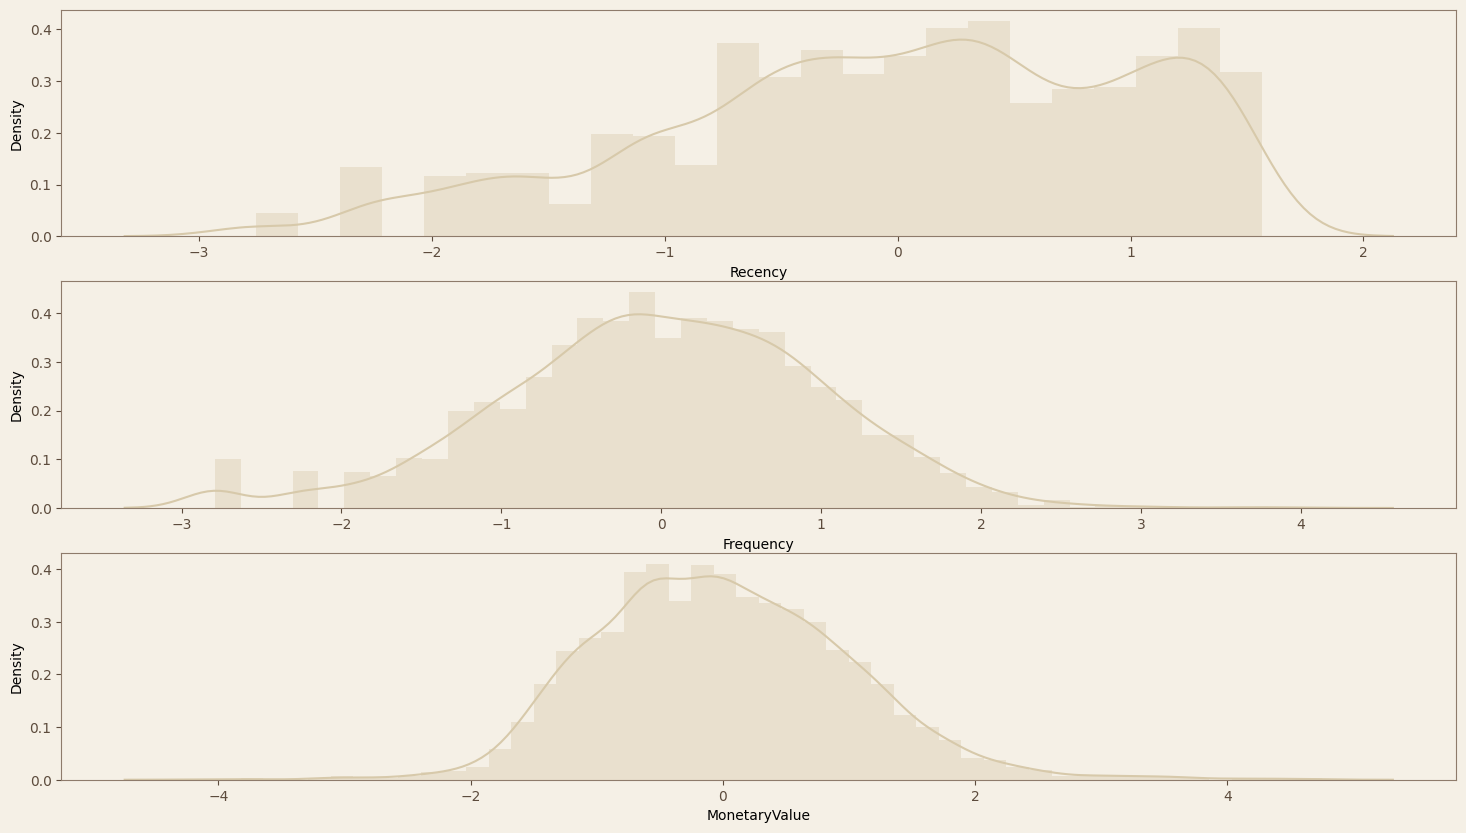

In [312]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['MonetaryValue'])

# Show the plot
plt.show()

### `Skewness has been removed`

## Clustering with K-means Algorithm

We will create several clusters based on our RFM data and use the **elbow method** to determine the optimal number of clusters.

In [315]:
sse = []

# Fit KMeans for cluster counts from 1 to 24 and record the sum of squared errors (SSE)
for i in range(1, 25):
    model = KMeans(n_clusters=i, random_state=40)
    model.fit(data_norm)
    sse.append(model.inertia_)

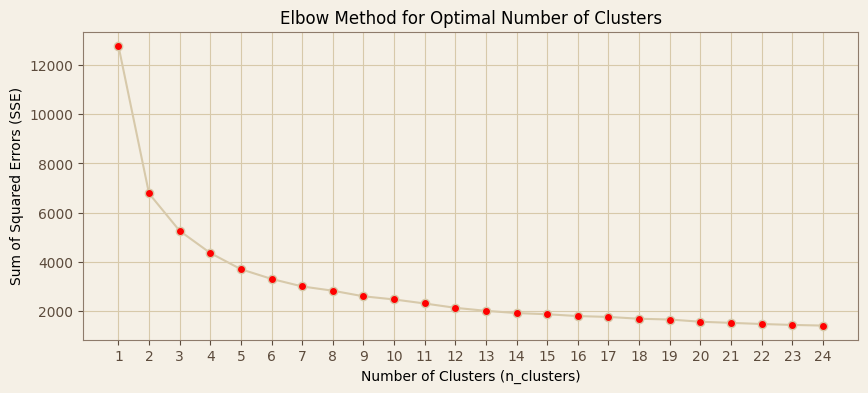

In [316]:
plt.figure(figsize=(10, 4))

plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(range(1, 25), sse, marker='o', markerfacecolor='red')
plt.xticks(ticks=range(1, 25))
plt.grid(True)
plt.show()


Based on the plot above, the ideal number of clusters appears to be 3, 4, or 5.

We'll start by selecting k = 3.

In [317]:
# Initialize KMeans with 3 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit the KMeans model on the normalized RFM data
kmeans.fit(data_norm)

# Assign cluster labels to each customer based on the fitted model
cluster_labels = kmeans.labels_


In [318]:
# Add cluster labels to the normalized RFM data for analysis
data_norm_k3 = data_norm.assign(Cluster=cluster_labels)

# Add cluster labels to the original RFM data for easier interpretation
data_k3 = rfm_data.assign(Cluster=cluster_labels)

# Group by cluster and calculate the mean Recency, Frequency, MonetaryValue,
# as well as the count of customers in each cluster
summary_k3 = data_k3.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

# Display the summary statistics for each cluster
summary_k3


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          68.0      60.0        1092.0  1846
1          15.0     247.0        6160.0  1000
2         167.0      14.0         283.0  1418

Let us now take k = 4.

In [320]:
# Initialize and fit the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_norm)

# Get cluster labels assigned to each data point
cluster_labels = kmeans.labels_


In [321]:
# Assign cluster labels to the normalized and original RFM data
data_norm_k4 = data_norm.assign(Cluster=cluster_labels)  # Normalized RFM data with clusters
data_k4 = rfm_data.assign(Cluster=cluster_labels)        # Original RFM data with clusters

# Group by cluster to calculate the mean Recency, Frequency, MonetaryValue and count of customers in each cluster
summary_k4 = data_k4.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

summary_k4


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          19.0      42.0         632.0   869
1          14.0     273.0        6907.0   856
2         100.0      74.0        1434.0  1220
3         171.0      14.0         277.0  1319

K=5

In [322]:
# Fit KMeans clustering with 5 clusters on normalized RFM data
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_norm)

# Assign the cluster labels to variable
cluster_labels = kmeans.labels_


In [323]:
# Add cluster labels to the normalized RFM dataset
data_norm_k5 = data_norm.assign(Cluster=cluster_labels)  # Normalized RFM data with clusters

# Add cluster labels to the original RFM dataset
data_k5 = rfm_data.assign(Cluster=cluster_labels)  # Original RFM data with clusters

# Group by cluster and calculate the average Recency, Frequency, MonetaryValue, and count of customers per cluster
summary_k5 = data_k5.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(0)

summary_k5


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          18.0      39.0         609.0   769
1           9.0     310.0        8321.0   638
2         158.0      31.0         591.0  1169
3         165.0       7.0         193.0   683
4          59.0     110.0        1967.0  1005

## Profiling and Interpreting segments

In [324]:
# Display the cluster summaries for k=3, k=4, and k=5

display(summary_k3)
display(summary_k4)
display(summary_k5)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          68.0      60.0        1092.0  1846
1          15.0     247.0        6160.0  1000
2         167.0      14.0         283.0  1418

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          19.0      42.0         632.0   869
1          14.0     273.0        6907.0   856
2         100.0      74.0        1434.0  1220
3         171.0      14.0         277.0  1319

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          18.0      39.0         609.0   769
1           9.0     310.0        8321.0   638
2         158.0      31.0         591.0  1169
3         165.0       7.0         193.0   683
4          59.0     110.0        1967.0  1005

### Visualizing Segments with Snake Plots

To gain insights and compare behaviors across different customer segments, we’ll create snake plots using our cluster data.

Before we proceed with plotting, we'll reassign the `CustomerID` values as the index for each of the normalized cluster datasets. This ensures that each row remains associated with a specific customer.

In [325]:
# Assign CustomerID values back to the index of the normalized RFM datasets
# This step ensures that each row is correctly associated with the corresponding customer
data_norm_k3.index = data['CustomerID'].astype(int)  # For 3-cluster solution
data_norm_k4.index = data['CustomerID'].astype(int)  # For 4-cluster solution
data_norm_k5.index = data['CustomerID'].astype(int)  # For 5-cluster solution


In [148]:
data_norm_k4.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,1.479712,-2.792006,3.723607,2
12347,-1.950298,1.034484,1.284471,1
12348,0.414363,-0.173034,0.732172,2
12349,-0.599867,0.480165,0.714405,1
12350,1.445249,-0.631221,-0.605778,3


In [149]:
# Melt the data into along format so RFM values and metric names are stored in 1 column each like Feature and its value
data_melt_k3=pd.melt(data_norm_k3.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4=pd.melt(data_norm_k4.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k5=pd.melt(data_norm_k5.reset_index(),id_vars=['CustomerID','Cluster'],
                  value_vars=['Recency','Frequency','MonetaryValue'],
                  var_name='Features',
                  value_name='Value')

data_melt_k4.head()

,CustomerID,Cluster,Features,Value
0,12346,2,Recency,1.479712
1,12347,1,Recency,-1.950298
2,12348,2,Recency,0.414363
3,12349,1,Recency,-0.599867
4,12350,3,Recency,1.445249


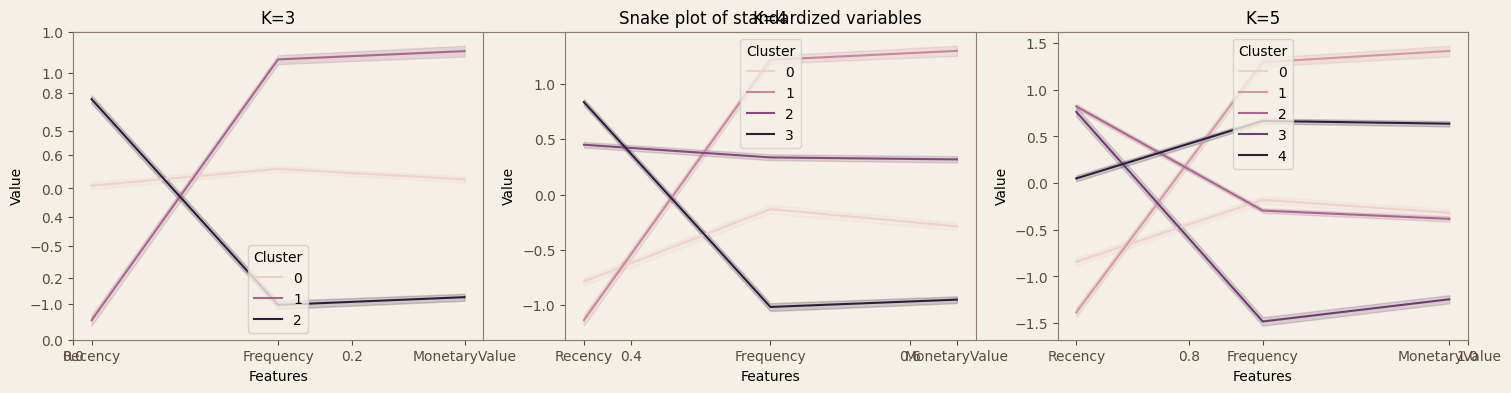

In [326]:
# Set the overall figure size
plt.figure(figsize=[18, 4])
plt.title('Snake plot of standardized variables')

# Plot snake plot for K=3 clusters
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k3)
plt.title('K=3')

# Plot snake plot for K=4 clusters
plt.subplot(1, 3, 2)  # 2nd plot
sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k4)
plt.title('K=4')

# Plot snake plot for K=5 clusters
plt.subplot(1, 3, 3)  # 3rd plot
sns.lineplot(x="Features", y="Value", hue='Cluster', data=data_melt_k5)
plt.title('K=5')

# Show all the plots together
plt.show()


From the snake plots above, we observe how the Recency, Frequency, and Monetary metrics vary across different clusters. Each cluster displays distinct behavior patterns, indicating that the segmentation has effectively created diverse groups of customers. Among the options, the separation appears most clear and meaningful when using **k = 3**, suggesting that 3 clusters may provide the most useful segmentation.

#### `Setting CustomerID as the index for the data_k4 and rfm_data DataFrames:`


In [327]:
# Set 'CustomerID' as the index for data_k4 DataFrame for easier reference and analysis
data_k4.index = data['CustomerID'].astype(int)
data_k4.head()

# Set 'CustomerID' as the index for the original rfm_data DataFrame as well
rfm_data.index = data['CustomerID'].astype(int)
rfm_data.head()


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,3,151,3598.21
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [329]:
# Calculate the average RFM values for each cluster (cluster-wise mean of Recency, Frequency, and MonetaryValue)
cluster_avg = data_k4.groupby(['Cluster']).mean()

# Calculate the average RFM values across the entire population (only using the first few rows here — likely unintentional)
population_avg = rfm_data.head().mean()  # Note: This only uses the top 5 rows


In [331]:
# Display the average RFM values for each cluster
display(cluster_avg)

# Display the average RFM values for the selected population (first 5 rows)
# ⚠️ Note: This is not the overall population average, just for the top 5 rows of the dataset
display(population_avg)

# ✅ Optional: If you want to display the true population average, use:
# display(rfm_data.mean())

,Recency,Frequency,MonetaryValue
Cluster,,,
0,19.166858,41.731876,631.673867
1,13.960280,272.560748,6906.809054
2,99.920492,74.064754,1434.057339
3,171.155421,14.080364,277.368788


,0
Recency,147.0
Frequency,54.6
MonetaryValue,16934.2


In [332]:
# Calculate the relative importance of each cluster's average RFM values compared to the overall population average
relative_imp = cluster_avg.divide(population_avg, axis=1)

# Round the results to 2 decimal places for better readability
relative_imp.round(2)


,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.13,0.76,0.04
1,0.09,4.99,0.41
2,0.68,1.36,0.08
3,1.16,0.26,0.02


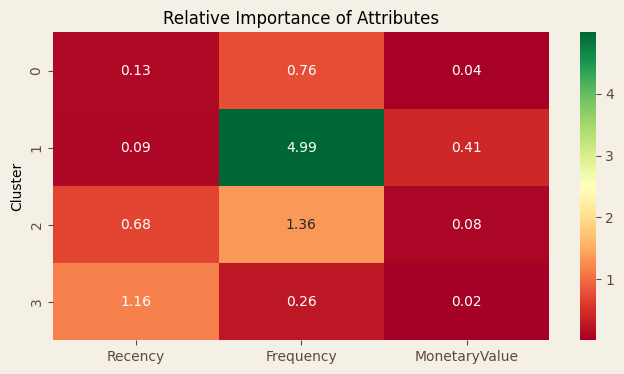

In [333]:
# Plot a heatmap to visualize the relative importance of RFM attributes across clusters
plt.figure(figsize=(8, 4))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


# Final Thoughts

Based on the analysis above, it appears that dividing the data into 4 clusters is most appropriate. To interpret these clusters from a business perspective, we should revisit the comparison table showing the mean values of recency, frequency, and monetary metrics for both 3 and 4 cluster models. Using this information, we can categorize the clusters as ‘New customers’, ‘Lost customers’, ‘Best customers’, and ‘At risk customers’.

The table below provides the RFM characteristics of each segment along with key considerations that companies should keep in mind when crafting marketing strategies tailored to these customer groups.
